Importing Data

In [57]:
# Importing data
import pandas as pd
full_data = pd.read_csv('phl_exoplanetCatalog.csv')

In [58]:
full_data.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


In [59]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


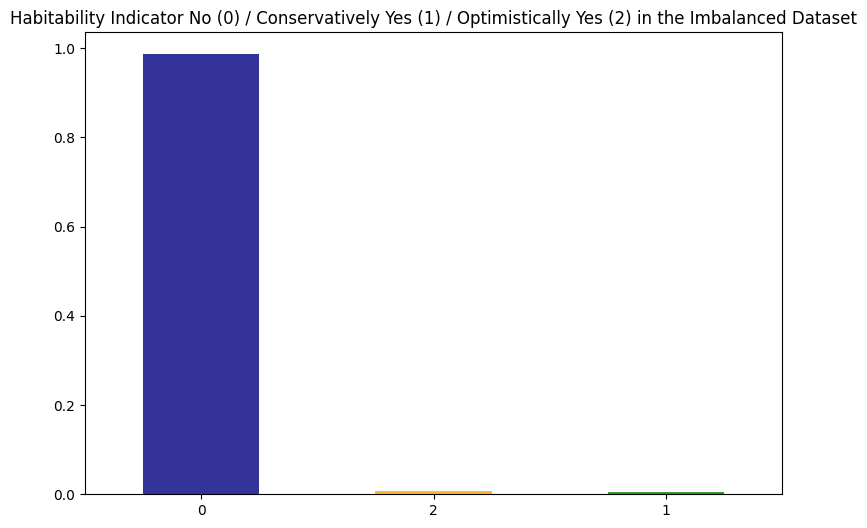

In [60]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (9,6))
full_data.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['navy','orange','green'], alpha = 0.8, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) in the Imbalanced Dataset')
plt.show()

In [61]:
full_data['P_HABITABLE'].value_counts(normalize=True)

0    0.986413
2    0.008399
1    0.005188
Name: P_HABITABLE, dtype: float64

Target looks like classification
Showing only top 10 of 84 continuous features
Linear Discriminant Analysis training set score: 0.865


[[<Figure size 2000x600 with 10 Axes>,
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 1600x400 with 4 Axes>,
  <Figure size 400x400 with 1 Axes>],
 None]

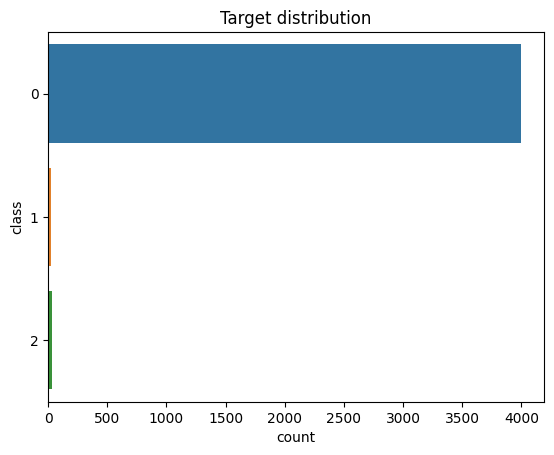

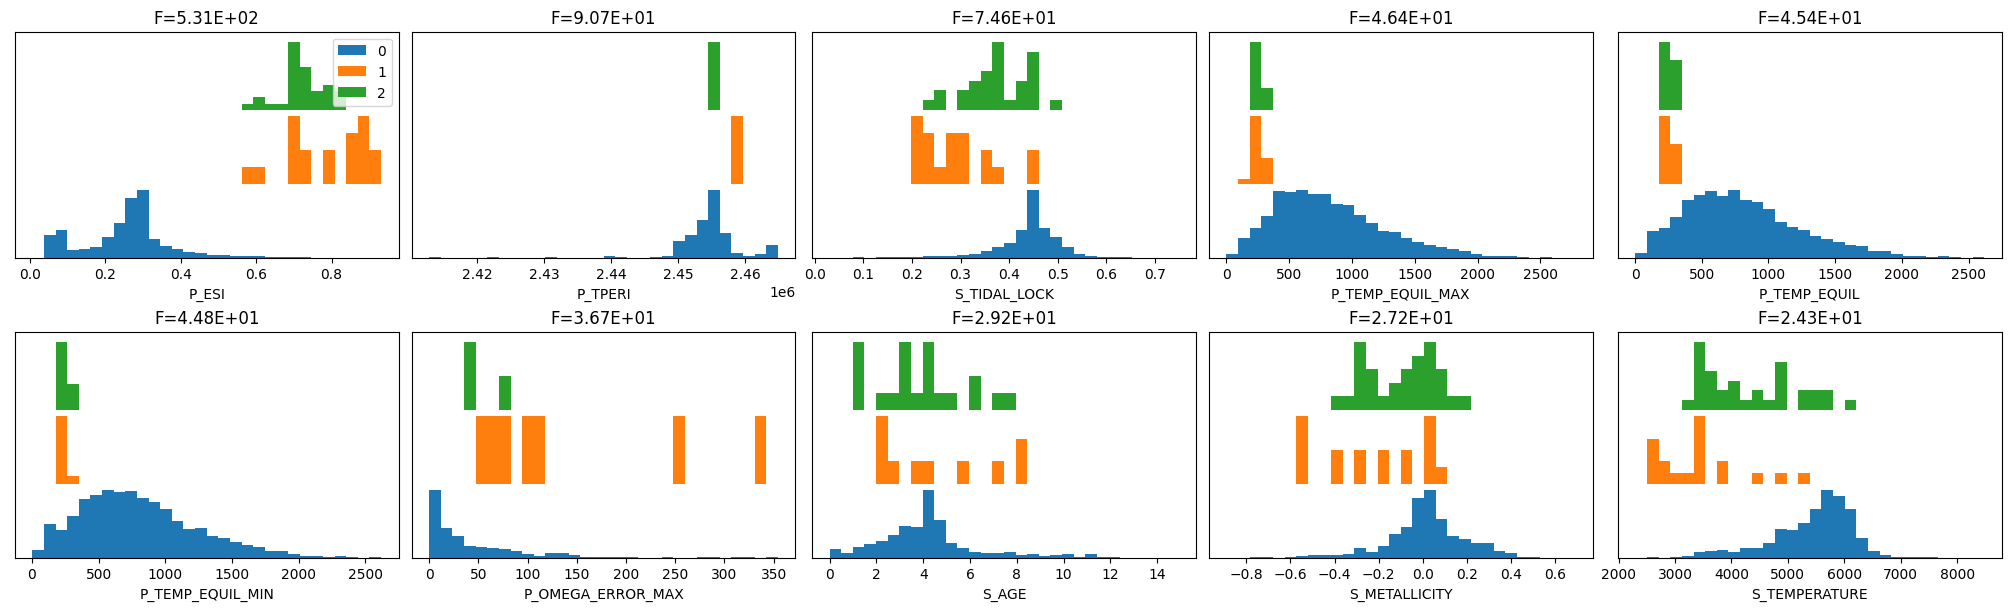

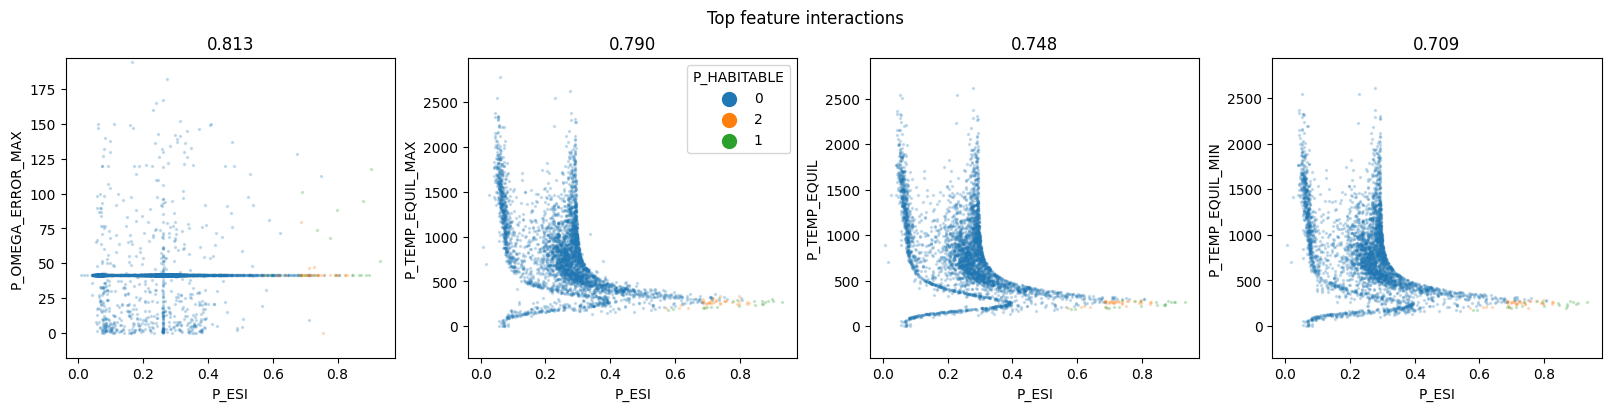

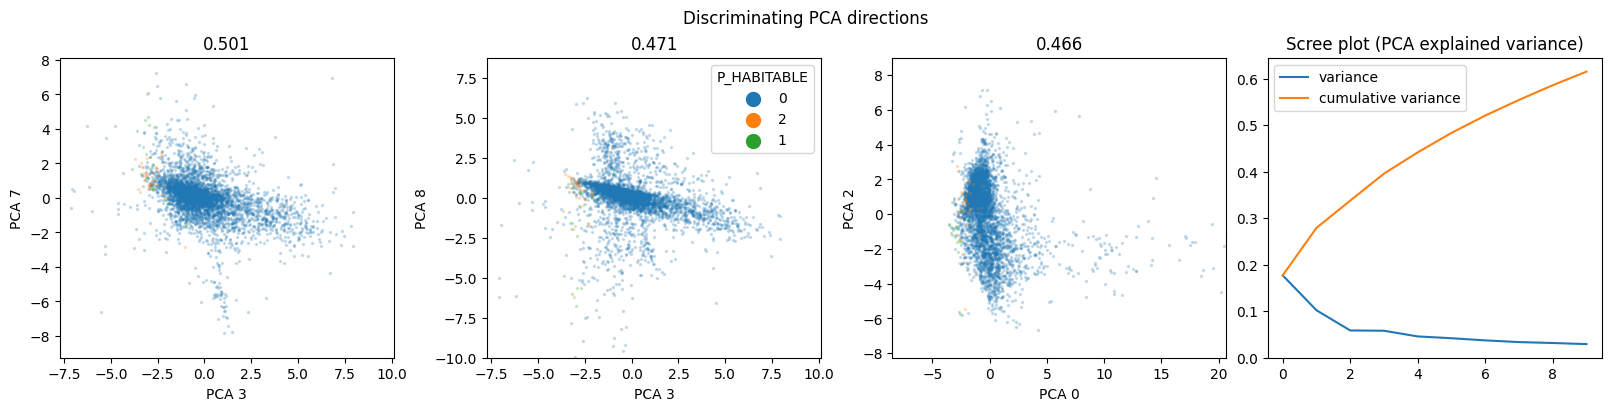

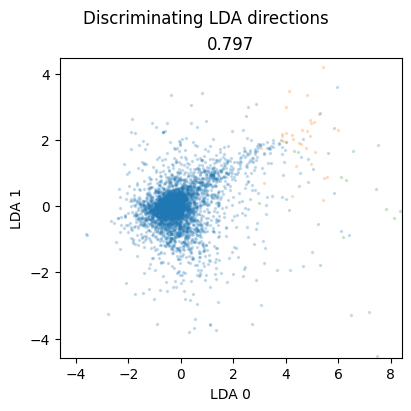

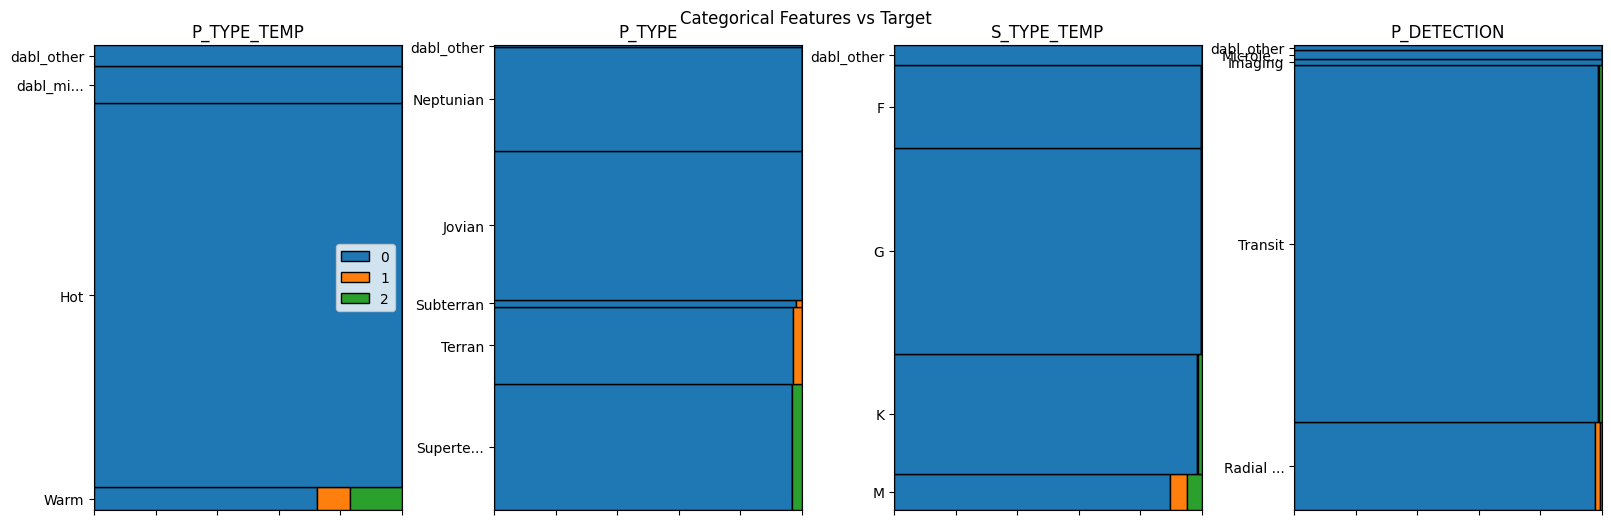

In [62]:
import dabl
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
dabl.plot(full_data, target_col = 'P_HABITABLE')

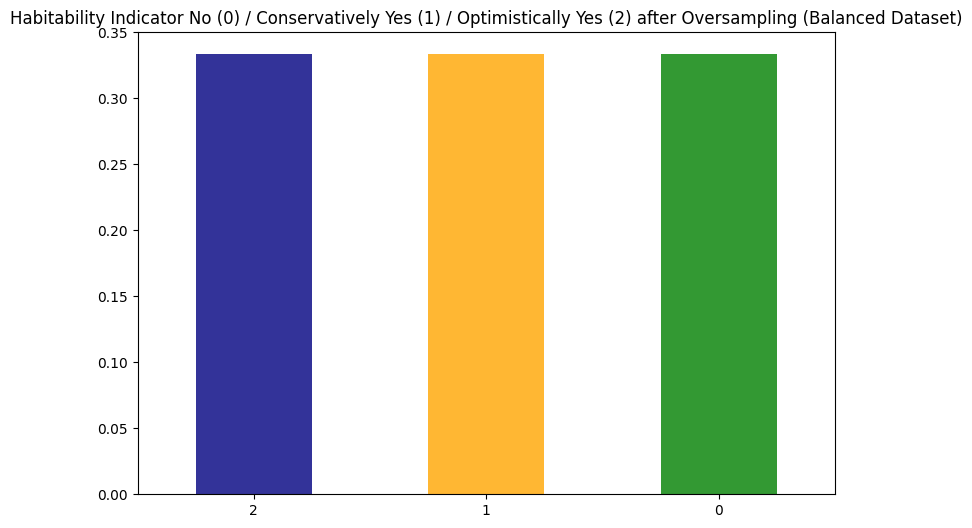

In [63]:
from sklearn.utils import resample

no = full_data[full_data.P_HABITABLE == 0]
yes_cons = full_data[full_data.P_HABITABLE == 1]
yes_opti = full_data[full_data.P_HABITABLE == 2]
yes_cons_oversampled = resample(yes_cons, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([no, yes_cons_oversampled])
yes_opti_oversampled = resample(yes_opti, replace=True, n_samples=len(no), random_state=12345)
oversampled = pd.concat([oversampled, yes_opti_oversampled])

fig = plt.figure(figsize = (9,6))
oversampled.P_HABITABLE.value_counts(normalize = True, ascending = False).plot(kind='bar', color= ['navy','orange','green'], alpha = 0.8, rot=0)
plt.title('Habitability Indicator No (0) / Conservatively Yes (1) / Optimistically Yes (2) after Oversampling (Balanced Dataset)')
plt.show()

In [64]:
oversampled['P_HABITABLE'].value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: P_HABITABLE, dtype: float64

In [65]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(50)

,Total,Percent
P_GEO_ALBEDO,11979,1.000000
P_DETECTION_MASS,11979,1.000000
P_DETECTION_RADIUS,11979,1.000000
P_ALT_NAMES,11979,1.000000
P_ATMOSPHERE,11979,1.000000
S_DISC,11979,1.000000
S_MAGNETIC_FIELD,11979,1.000000
P_TEMP_MEASURED,11469,0.957425
P_GEO_ALBEDO_ERROR_MIN,11469,0.957425
P_GEO_ALBEDO_ERROR_MAX,11469,0.957425


In [66]:
compact_data = oversampled.drop(['P_GEO_ALBEDO', 'P_DETECTION_MASS', 'P_DETECTION_RADIUS', 'P_ALT_NAMES', 'P_ATMOSPHERE', 'S_DISC', 'S_MAGNETIC_FIELD', 
                 'P_TEMP_MEASURED', 'P_GEO_ALBEDO_ERROR_MIN', 'P_GEO_ALBEDO_ERROR_MAX', 'P_TPERI_ERROR_MAX', 'P_TPERI_ERROR_MIN', 'P_TPERI', 
                 'P_DENSITY', 'P_ESCAPE', 'P_GRAVITY', 'P_POTENTIAL', 'P_OMEGA_ERROR_MAX', 'P_OMEGA_ERROR_MIN', 'P_OMEGA', 'P_INCLINATION_ERROR_MAX', 
                 'P_INCLINATION_ERROR_MIN', 'P_INCLINATION', 'P_ECCENTRICITY_ERROR_MAX', 'P_ECCENTRICITY_ERROR_MIN', 'S_AGE_ERROR_MIN', 'S_AGE_ERROR_MAX', 
                 'P_IMPACT_PARAMETER_ERROR_MIN', 'P_IMPACT_PARAMETER_ERROR_MAX', 'P_IMPACT_PARAMETER', 'P_MASS_ERROR_MAX', 'P_MASS_ERROR_MIN', 'P_HILL_SPHERE', 
                 'P_MASS'], axis = 1)

In [67]:
compact_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  object 
 1   P_STATUS                     11979 non-null  float64
 2   P_RADIUS                     8239 non-null   float64
 3   P_RADIUS_ERROR_MIN           8205 non-null   float64
 4   P_RADIUS_ERROR_MAX           8205 non-null   float64
 5   P_YEAR                       11979 non-null  int64  
 6   P_UPDATED                    11979 non-null  object 
 7   P_PERIOD                     11869 non-null  float64
 8   P_PERIOD_ERROR_MIN           11738 non-null  float64
 9   P_PERIOD_ERROR_MAX           11738 non-null  float64
 10  P_SEMI_MAJOR_AXIS            8981 non-null   float64
 11  P_SEMI_MAJOR_AXIS_ERROR_MIN  7716 non-null   float64
 12  P_SEMI_MAJOR_AXIS_ERROR_MAX  7717 non-null   float64
 13  P_ECCENTRICITY   

In [68]:
compact_data.select_dtypes(include=['object']).columns

Index(['P_NAME', 'P_UPDATED', 'P_DETECTION', 'S_NAME', 'S_TYPE', 'S_ALT_NAMES',
       'P_TYPE', 'S_TYPE_TEMP', 'S_RA_T', 'S_DEC_T', 'P_TYPE_TEMP',
       'S_CONSTELLATION', 'S_CONSTELLATION_ABR', 'S_CONSTELLATION_ENG'],
      dtype='object')

In [69]:
compact_data_obj = compact_data.select_dtypes(include=['object'])

In [70]:
total = compact_data_obj.isnull().sum().sort_values(ascending=False)
percent = (compact_data_obj.isnull().sum()/compact_data_obj.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
S_TYPE,5853,0.488605
P_TYPE_TEMP,327,0.027298
S_TYPE_TEMP,136,0.011353
P_TYPE,17,0.001419
S_CONSTELLATION_ENG,0,0.000000


In [71]:
compact_data['S_TYPE'] = compact_data['S_TYPE'].fillna(compact_data['S_TYPE'].mode()[0])
compact_data['P_TYPE_TEMP'] = compact_data['P_TYPE_TEMP'].fillna(compact_data['P_TYPE_TEMP'].mode()[0])
compact_data['S_TYPE_TEMP'] = compact_data['S_TYPE_TEMP'].fillna(compact_data['S_TYPE_TEMP'].mode()[0])
compact_data['P_TYPE'] = compact_data['P_TYPE'].fillna(compact_data['P_TYPE'].mode()[0])

In [72]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in compact_data.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    compact_data[col] = lencoders[col].fit_transform(compact_data[col])

In [73]:
import warnings
warnings.filterwarnings("ignore")

In [74]:
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = compact_data.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(compact_data)

In [75]:
MiceImputed.head()

,P_NAME,P_STATUS,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,P_PERIOD,P_PERIOD_ERROR_MIN,P_PERIOD_ERROR_MAX,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,0.0,3.0,2.723031,-0.238321,0.310348,2007.0,0.0,326.03000,-0.32,0.32,...,0.0,1.0,0.0,0.083813,24.0,24.0,5.0,12.082709,6165.86330,1.29
1,1.0,3.0,2.723031,-0.238321,0.310348,2009.0,146.0,516.21997,-3.20,3.20,...,0.0,1.0,0.0,0.082414,83.0,83.0,42.0,12.229641,4684.78480,1.53
2,2.0,3.0,2.723031,-0.238321,0.310348,2008.0,0.0,185.84000,-0.23,0.23,...,0.0,1.0,0.0,0.081917,0.0,0.0,2.0,12.848516,1525.57440,0.83
3,3.0,3.0,2.723031,-0.238321,0.310348,2002.0,146.0,1773.40000,-2.50,2.50,...,0.0,0.0,0.0,0.145241,39.0,39.0,34.0,12.865261,1481.07850,2.93
4,4.0,3.0,2.723031,-0.238321,0.310348,1996.0,146.0,798.50000,-1.00,1.00,...,1.0,2.0,0.0,0.368627,30.0,30.0,75.0,13.421749,565.73385,1.66


In [76]:
MiceImputed.isna().sum(axis = 0)

P_NAME                   0
P_STATUS                 0
P_RADIUS                 0
P_RADIUS_ERROR_MIN       0
P_RADIUS_ERROR_MAX       0
                        ..
S_CONSTELLATION_ABR      0
S_CONSTELLATION_ENG      0
P_RADIUS_EST             0
P_MASS_EST               0
P_SEMI_MAJOR_AXIS_EST    0
Length: 78, dtype: int64

In [77]:
#Drop perfectly correlated features
working_data = MiceImputed.drop(['S_NAME', 'P_RADIUS', 'P_RADIUS_ERROR_MIN', 'P_RADIUS_ERROR_MAX', 'P_DISTANCE', 'P_PERIASTRON', 'P_APASTRON', 
                                 'P_DISTANCE_EFF', 'P_FLUX_MIN', 'P_FLUX_MAX', 'P_TEMP_EQUIL', 'P_TEMP_EQUIL_MIN', 'P_TEMP_EQUIL_MAX', 
                                 'S_RADIUS_EST', 'S_RA_H', 'S_RA_T', 'S_LUMINOSITY', 'S_HZ_OPT_MIN', 'S_HZ_OPT_MAX', 'S_HZ_CON_MIN', 
                                 'S_HZ_CON_MAX', 'S_HZ_CON0_MIN', 'S_HZ_CON0_MAX', 'S_HZ_CON1_MIN', 'S_HZ_CON1_MAX', 'S_SNOW_LINE', 
                                'P_PERIOD_ERROR_MIN', 'P_PERIOD_ERROR_MAX', 'S_MAG', 'S_DISTANCE_ERROR_MIN', 'S_DISTANCE_ERROR_MAX', 
                                 'S_METALLICITY', 'S_METALLICITY_ERROR_MIN', 'S_METALLICITY_ERROR_MAX', 'S_AGE', 'S_TEMPERATURE_ERROR_MIN', 
                                 'S_TEMPERATURE_ERROR_MAX', 'S_ABIO_ZONE', 'P_ESI', 'S_CONSTELLATION_ABR', 'P_SEMI_MAJOR_AXIS_EST'], axis=1)

In [78]:
working_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11979 entries, 0 to 2205
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   P_NAME                       11979 non-null  float64
 1   P_STATUS                     11979 non-null  float64
 2   P_YEAR                       11979 non-null  float64
 3   P_UPDATED                    11979 non-null  float64
 4   P_PERIOD                     11979 non-null  float64
 5   P_SEMI_MAJOR_AXIS            11979 non-null  float64
 6   P_SEMI_MAJOR_AXIS_ERROR_MIN  11979 non-null  float64
 7   P_SEMI_MAJOR_AXIS_ERROR_MAX  11979 non-null  float64
 8   P_ECCENTRICITY               11979 non-null  float64
 9   P_ANGULAR_DISTANCE           11979 non-null  float64
 10  P_DETECTION                  11979 non-null  float64
 11  S_RA                         11979 non-null  float64
 12  S_DEC                        11979 non-null  float64
 13  S_DISTANCE       

In [79]:
Q1 = working_data.quantile(0.25)
Q3 = working_data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

P_NAME                         2150.000000
P_STATUS                          0.000000
P_YEAR                            3.000000
P_UPDATED                        90.000000
P_PERIOD                        101.914721
P_SEMI_MAJOR_AXIS                 1.827347
P_SEMI_MAJOR_AXIS_ERROR_MIN       0.094715
P_SEMI_MAJOR_AXIS_ERROR_MAX       0.101550
P_ECCENTRICITY                    0.049866
P_ANGULAR_DISTANCE               58.917636
P_DETECTION                       1.000000
S_RA                            122.166550
S_DEC                            54.138227
S_DISTANCE                      481.440000
S_MASS                            0.520000
S_MASS_ERROR_MIN                  0.050000
S_MASS_ERROR_MAX                  0.050000
S_RADIUS                          0.540000
S_RADIUS_ERROR_MIN                0.060547
S_RADIUS_ERROR_MAX                0.087495
S_TYPE                            0.000000
S_TEMPERATURE                  1997.530000
S_LOG_G                           0.413547
S_ALT_NAMES

In [80]:
# Removing outliers from dataset
working_data = working_data[~((working_data < (Q1 - 1.5 * IQR)) |(working_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [81]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import RandomForestClassifier as rf

X = working_data.drop('P_HABITABLE', axis=1)
y = working_data['P_HABITABLE']
perm = PermutationImportance(rf(n_estimators=10, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0005 ± 0.0002,P_TYPE_TEMP
0 ± 0.0000,S_RADIUS_ERROR_MAX
0 ± 0.0000,P_UPDATED
0 ± 0.0000,P_PERIOD
0 ± 0.0000,P_SEMI_MAJOR_AXIS
0 ± 0.0000,P_SEMI_MAJOR_AXIS_ERROR_MIN
0 ± 0.0000,P_SEMI_MAJOR_AXIS_ERROR_MAX
0 ± 0.0000,P_ECCENTRICITY
0 ± 0.0000,P_ANGULAR_DISTANCE
0 ± 0.0000,P_DETECTION


In [83]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

#X = working_data.drop('P_HABITABLE', axis=1)
#y = MiceImputed['P_HABITABLE']
selector = SelectFromModel(rf(n_estimators=1000, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=1000, random_state=0).fit(X,y).feature_importances_)

['P_PERIOD', 'P_ECCENTRICITY', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_FLUX', 'P_TYPE', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.00807502 0.         0.00159825 0.00757096 0.02980817 0.01148693
 0.01415279 0.01053405 0.04334575 0.01540115 0.00016531 0.00976828
 0.0330293  0.09481953 0.06080957 0.00422196 0.00346254 0.00387975
 0.00147603 0.00161452 0.         0.04187959 0.01036243 0.
 0.0551828  0.07853786 0.0142459  0.02399169 0.0456951  0.0523036
 0.00420935 0.05160802 0.00119332 0.0008429  0.13633584 0.12839173]


In [84]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier as et

#X = working_data.drop('P_HABITABLE', axis=1)
#y = MiceImputed['P_HABITABLE']
selector = SelectFromModel(et(n_estimators=1000, random_state=123))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(et(n_estimators=100, random_state=123).fit(X,y).feature_importances_)

['P_PERIOD', 'P_SEMI_MAJOR_AXIS_ERROR_MIN', 'P_ECCENTRICITY', 'S_DEC', 'S_DISTANCE', 'S_MASS', 'S_TEMPERATURE', 'P_TYPE', 'S_TYPE_TEMP', 'S_TIDAL_LOCK', 'P_HABZONE_OPT', 'P_TYPE_TEMP', 'P_RADIUS_EST', 'P_MASS_EST']
[0.02115536 0.         0.00639043 0.00512129 0.02476454 0.022409
 0.04757502 0.02523442 0.06187232 0.00796848 0.01724341 0.01302943
 0.05428342 0.04054109 0.03792335 0.00742641 0.01307266 0.01610923
 0.00662067 0.00698211 0.         0.03658559 0.02081428 0.
 0.03351391 0.11729292 0.0386365  0.01551    0.02628222 0.08025007
 0.01302334 0.05927778 0.00996582 0.00865165 0.05502442 0.04944888]


In [85]:
features = working_data[['P_TYPE_TEMP','P_PERIOD','S_DEC','S_DISTANCE','S_MASS','S_TEMPERATURE','P_TYPE','S_TIDAL_LOCK','P_HABZONE_OPT','P_RADIUS_EST']]
target = working_data['P_HABITABLE']
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, cohen_kappa_score, plot_confusion_matrix, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model_ovr = OneVsRestClassifier(model)
        model_ovr.fit(X_train,y_train, verbose=0)
    else:
        model_ovr = OneVsRestClassifier(model)
        model_ovr.fit(X_train,y_train)
    y_pred = model_ovr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    h_loss = hamming_loss(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("Hamming Loss = {}".format(h_loss))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model_ovr, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')   
    
    return accuracy, h_loss, coh_kap, time_taken

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=12345)

# Normalize Features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [86]:
import time
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, cohen_kappa_score, plot_confusion_matrix, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model_ovr = OneVsRestClassifier(model)
        model_ovr.fit(X_train,y_train, verbose=0)
    else:
        model_ovr = OneVsRestClassifier(model)
        model_ovr.fit(X_train,y_train)
    y_pred = model_ovr.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    h_loss = hamming_loss(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("Hamming Loss = {}".format(h_loss))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model_ovr, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')   
    
    return accuracy, h_loss, coh_kap, time_taken

Accuracy = 1.0
Hamming Loss = 0.0
Cohen's Kappa = 1.0
Time taken = 0.1524507999420166
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000        60
         1.0    1.00000   1.00000   1.00000       391
         2.0    1.00000   1.00000   1.00000       310

    accuracy                        1.00000       761
   macro avg    1.00000   1.00000   1.00000       761
weighted avg    1.00000   1.00000   1.00000       761



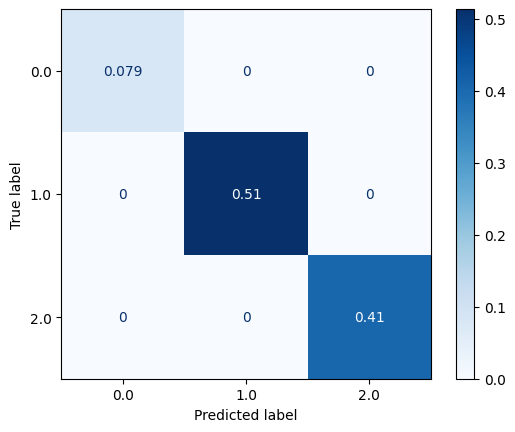

In [87]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'saga', 'multi_class':'multinomial'} #Ridge regularization
model_lr = LogisticRegression(**params_lr)
accuracy_lr, h_loss_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.9986859395532195
Hamming Loss = 0.001314060446780552
Cohen's Kappa = 0.9976671397784855
Time taken = 0.009424209594726562
              precision    recall  f1-score   support

         0.0    1.00000   0.98333   0.99160        60
         1.0    0.99745   1.00000   0.99872       391
         2.0    1.00000   1.00000   1.00000       310

    accuracy                        0.99869       761
   macro avg    0.99915   0.99444   0.99677       761
weighted avg    0.99869   0.99869   0.99868       761



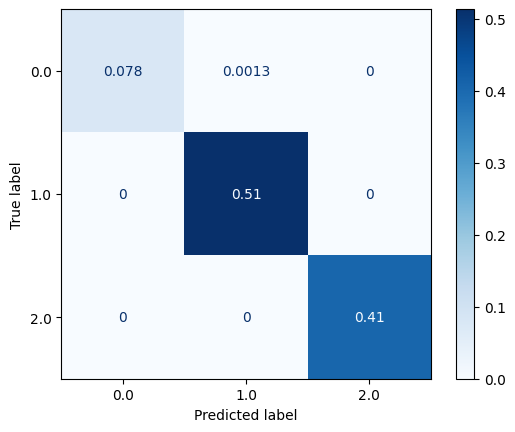

In [88]:
from sklearn.linear_model import SGDClassifier
# Lasso regularization
params_sgd = {'loss':'hinge', 'penalty':'l2', 'alpha': 1e-3, 'random_state': 12345, 'max_iter': 6, 'tol': None}
model_sgd = SGDClassifier(**params_sgd)
accuracy_sgd, h_loss_sgd, coh_kap_sgd, tt_sgd = run_model(model_sgd, X_train, y_train, X_test, y_test)

Accuracy = 0.8817345597897503
Hamming Loss = 0.11826544021024968
Cohen's Kappa = 0.7817455259266812
Time taken = 0.007937192916870117
              precision    recall  f1-score   support

         0.0    0.00000   0.00000   0.00000        60
         1.0    0.99449   0.92327   0.95756       391
         2.0    0.77889   1.00000   0.87571       310

    accuracy                        0.88173       761
   macro avg    0.59113   0.64109   0.61109       761
weighted avg    0.82826   0.88173   0.84872       761



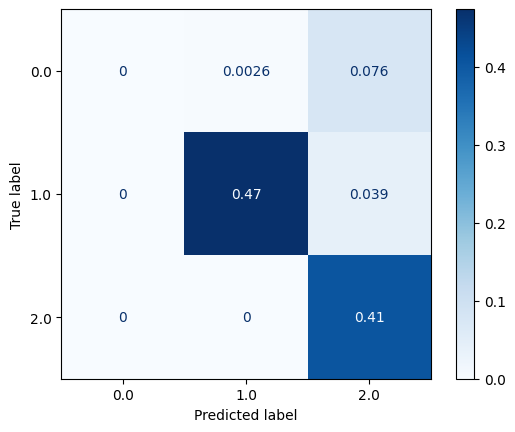

In [89]:
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
accuracy_mnb, h_loss_mnb, coh_kap_mnb, tt_mnb = run_model(model_mnb, X_train, y_train, X_test, y_test)

Accuracy = 1.0
Hamming Loss = 0.0
Cohen's Kappa = 1.0
Time taken = 0.012353181838989258
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000        60
         1.0    1.00000   1.00000   1.00000       391
         2.0    1.00000   1.00000   1.00000       310

    accuracy                        1.00000       761
   macro avg    1.00000   1.00000   1.00000       761
weighted avg    1.00000   1.00000   1.00000       761



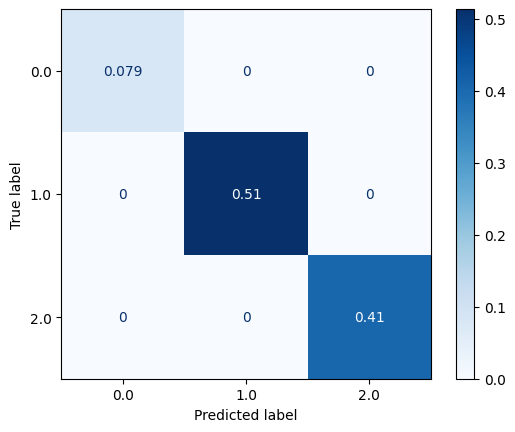

In [90]:
from sklearn.linear_model import PassiveAggressiveClassifier
params_pac = {'fit_intercept':True, 'random_state': 12345, 'loss':'hinge'}
model_pac = PassiveAggressiveClassifier(**params_pac)
accuracy_pac, h_loss_pac, coh_kap_pac, tt_pac = run_model(model_pac, X_train, y_train, X_test, y_test)

Accuracy = 1.0
Hamming Loss = 0.0
Cohen's Kappa = 1.0
Time taken = 0.010291576385498047
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000        60
         1.0    1.00000   1.00000   1.00000       391
         2.0    1.00000   1.00000   1.00000       310

    accuracy                        1.00000       761
   macro avg    1.00000   1.00000   1.00000       761
weighted avg    1.00000   1.00000   1.00000       761



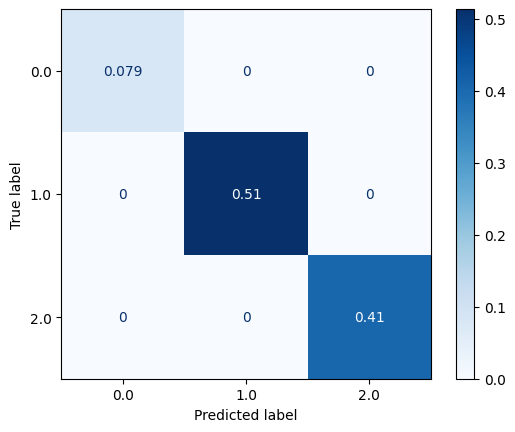

In [91]:
from sklearn.linear_model import Perceptron
params_p = {'penalty':None, 'alpha': 1e-5, 'fit_intercept': True, 'random_state': 12345}
model_p = Perceptron(**params_p)
accuracy_p, h_loss_p, coh_kap_p, tt_p = run_model(model_p, X_train, y_train, X_test, y_test)

Accuracy = 0.8869908015768725
Hamming Loss = 0.11300919842312747
Cohen's Kappa = 0.7952086214773417
Time taken = 0.37031078338623047
              precision    recall  f1-score   support

         0.0    1.00000   1.00000   1.00000        60
         1.0    0.81971   1.00000   0.90092       391
         2.0    1.00000   0.72258   0.83895       310

    accuracy                        0.88699       761
   macro avg    0.93990   0.90753   0.91329       761
weighted avg    0.90737   0.88699   0.88349       761



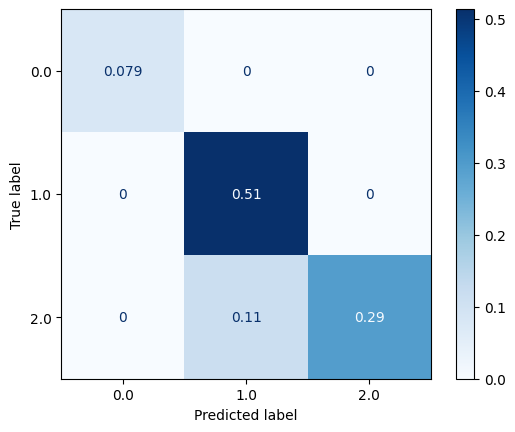

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
params_gb = {'loss':'deviance', 'criterion': 'mse', 'n_estimators': 100, 'max_depth': 4, 'random_state': 12345, 'max_features': 'auto'}
model_gb = GradientBoostingClassifier(**params_gb)
accuracy_gb, h_loss_gb, coh_kap_gb, tt_gb = run_model(model_gb, X_train, y_train, X_test, y_test)

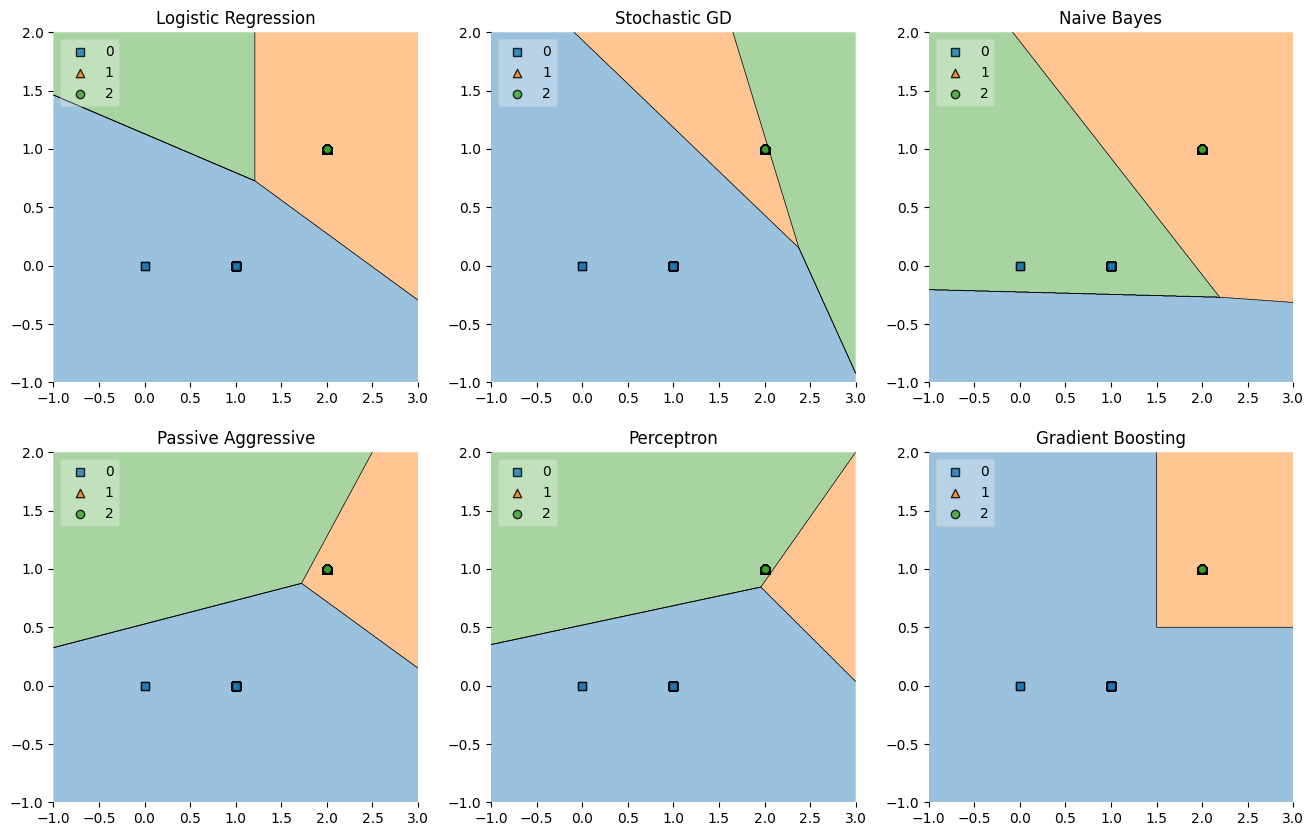

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

value = 1.50
width = 0.75

clf1 = LogisticRegression(solver='saga', penalty='l1', random_state=12345)
clf2 = SGDClassifier(random_state=12345)
clf3 = MultinomialNB()
clf4 = PassiveAggressiveClassifier(random_state=12345) 
clf5 = Perceptron(random_state=12345, verbose = 0)
clf6 = GradientBoostingClassifier(n_estimators=1000, random_state=12345, verbose=0)

#Only taking the important planetarial features 
X_list = working_data[["P_TYPE_TEMP", "P_HABZONE_OPT", "P_RADIUS_EST"]] 
X = np.asarray(X_list, dtype=np.float32)
y_list = working_data["P_HABITABLE"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(2,3)
fig = plt.figure(figsize=(16,10))

labels = ['Logistic Regression',
          'Stochastic GD',
          'Naive Bayes',
          'Passive Aggressive',
          'Perceptron',
          'Gradient Boosting']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value}, 
                                filler_feature_ranges={2: width}, 
                                legend=2)
    plt.title(lab)

plt.show()